## Analisis Descriptivo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

## Output Steam Games

In [3]:
df_steam_games= pd.read_csv('Datos-Normalizados/output_steam_games_normalizado.csv')
df_steam_games.head(5)

,Unnamed: 0,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,88313,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,88315,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd


In [4]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29783 entries, 0 to 29782
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    29783 non-null  int64  
 1   publisher     23774 non-null  object 
 2   genres        28549 non-null  object 
 3   app_name      29782 non-null  object 
 4   title         29782 non-null  object 
 5   url           29783 non-null  object 
 6   release_date  29783 non-null  object 
 7   tags          29622 non-null  object 
 8   reviews_url   29782 non-null  object 
 9   specs         29114 non-null  object 
 10  price         28782 non-null  object 
 11  early_access  29783 non-null  bool   
 12  id            29782 non-null  float64
 13  developer     28533 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 3.0+ MB


In [5]:
# Reemplaza los valores no finitos (NaN o infinito) con un valor específico, por ejemplo, 0
df_steam_games['id'] = df_steam_games['id'].replace([np.inf, -np.inf], np.nan)
df_steam_games['id'] = df_steam_games['id'].fillna(0)

# Ahora intenta convertir la columna 'id' a int
df_steam_games['id'] = df_steam_games['id'].astype(int)


In [6]:
df_steam_games['id'].head()

0    761140
1    643980
2    670290
3    767400
4    772540
Name: id, dtype: int32

In [7]:

df_steam_games['price'] = pd.to_numeric(df_steam_games['price'], errors='coerce')
df_steam_games['price'].fillna(0, inplace=True)


vemos la distribucion de precios

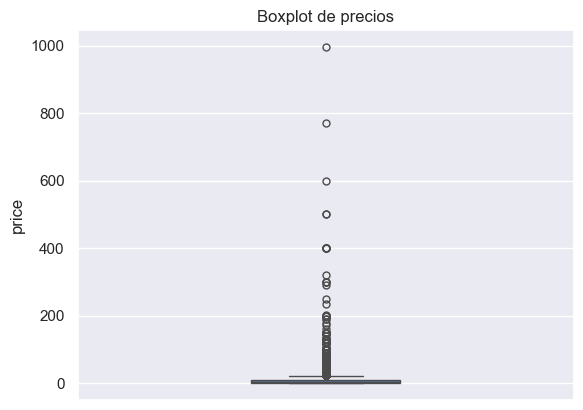

In [8]:

sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.title('Boxplot de precios')
plt.show()


pongo un limite para poder ver mejor la distribucion de precios

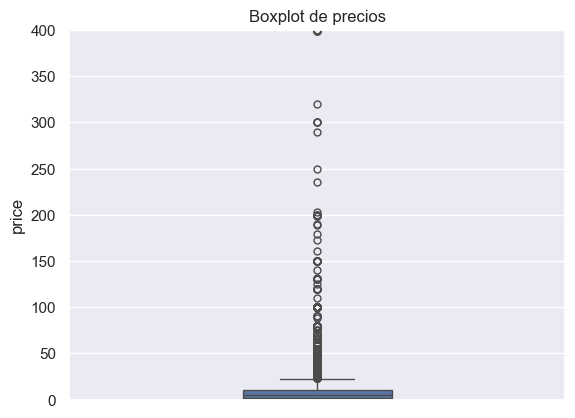

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.ylim(0, 400)

plt.title('Boxplot de precios')
plt.show()


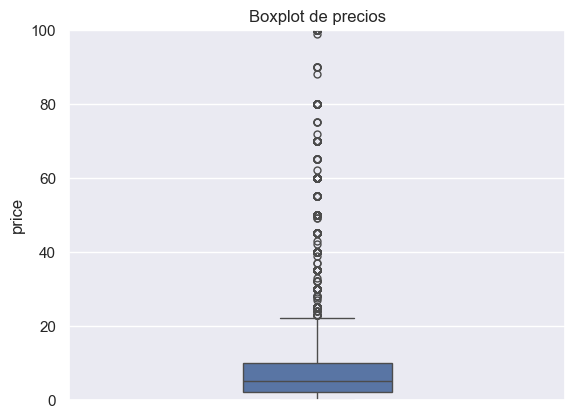

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.ylim(0, 100)

plt.title('Boxplot de precios')
plt.show()


la mayoria de valores del precio se encuentran en numeros menores de 100

el valor normal del precio de los juegos se encuentran de 20 para abajo, aunque hay muchos outliers, se encuentra dentro de lo normal para la industria, el tratado que voy a hacer es descartar los juegos que superen los 200 dolares ya que pueden afectar mucho a los promedios, etc, ademas son muy pocos los items que superan este valor 

In [11]:

df_steam_games = df_steam_games[df_steam_games['price'] <= 200]
df_steam_games=df_steam_games.dropna()

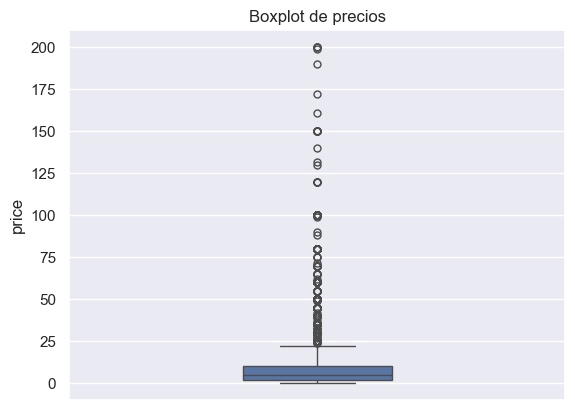

In [12]:
import seaborn as sns


sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.title('Boxplot de precios')
plt.show()


distribucion de generos

In [13]:
# Convertimos las cadenas de géneros en listas
import ast
df_steam_games['genres'] = df_steam_games['genres'].apply(ast.literal_eval)

C:\Users\Facundete\AppData\Local\Temp\ipykernel_5304\1722720696.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values,palette='husl')


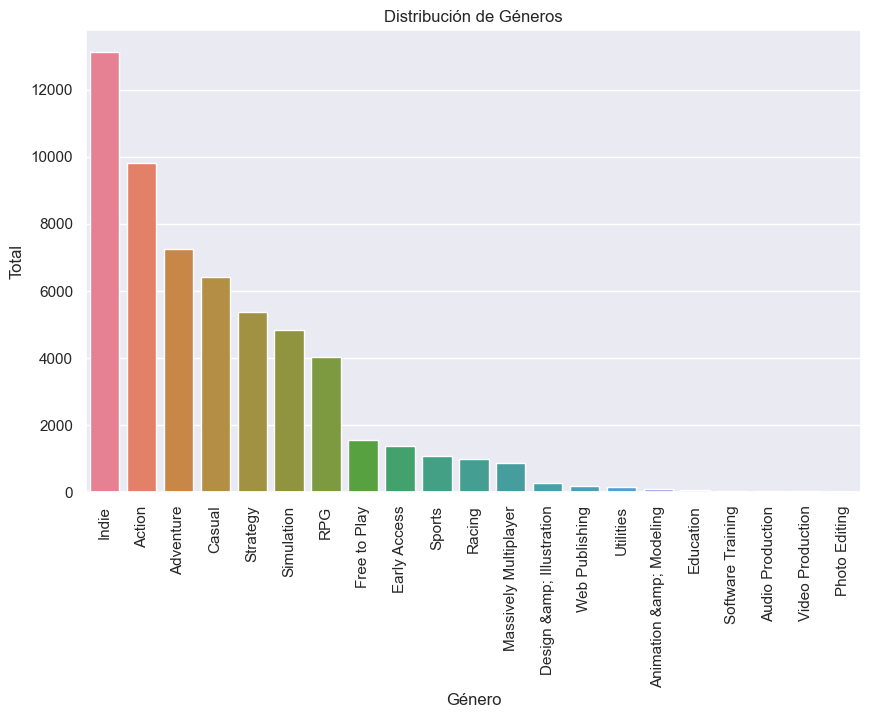

In [14]:
import pandas as pd
import seaborn as sns
import ast

# Ahora, aplanamos la lista de géneros
genres = df_steam_games['genres'].explode()

# Calculamos la frecuencia de cada género
genre_counts = genres.value_counts()

# Creamos el gráfico de barras con seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values,palette='husl')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Total')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización
plt.show()


In [15]:
df_steam_games.to_json('steam_games.json', orient='records', lines=True)

## User Reviews

In [16]:
df_user_reviews= pd.read_csv("Datos-Normalizados/australian_user_reviews_normalizado.csv")
df_user_reviews.sample(10)

,Unnamed: 0,user_id,user_url,reviews,review_content
16869,16869,slowyt,http://steamcommunity.com/id/slowyt,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""I don't know what you guys are talking about..."
11991,11991,goddamnparticle,http://steamcommunity.com/id/goddamnparticle,"[{'sentiment_analysis': 0, 'funny': '', 'poste...","[""This game is absolutely brutal, and unforgiv..."
9855,9855,fraterNZ,http://steamcommunity.com/id/fraterNZ,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['Great game really enjoied playing. Just fini...
6089,6089,76561198053711199,http://steamcommunity.com/profiles/76561198053...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['You shoot poop. You eat Poop.8/8 m8']
12380,12380,GoldiLoks,http://steamcommunity.com/id/GoldiLoks,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""This game is absolutely amazing! I'm sooo ad..."
22445,22445,76561198072604584,http://steamcommunity.com/profiles/76561198072...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['A great game, loads of fun, best to play wit..."
2165,2165,SirTired,http://steamcommunity.com/id/SirTired,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['This game is pretty cool, very retro, fun to..."
10906,10906,coolman1342,http://steamcommunity.com/id/coolman1342,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['This is one of the greatest games i have eve...
11478,11478,theo8396,http://steamcommunity.com/id/theo8396,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['In one scene our protagonist, Kung Fury, pul..."
10722,10722,76561198070692004,http://steamcommunity.com/profiles/76561198070...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['taught me how to cook meth']


elimino nulos

In [17]:
df_user_reviews=df_user_reviews.dropna()

In [18]:
df_user_reviews

,Unnamed: 0,user_id,user_url,reviews,review_content
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['Simple yet with great replayability. In my o...
1,1,js41637,http://steamcommunity.com/id/js41637,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['I know what you think when you see this titl...
2,2,evcentric,http://steamcommunity.com/id/evcentric,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""A suitably punishing roguelike platformer. ..."
3,3,doctr,http://steamcommunity.com/id/doctr,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['This game... is so fun. The fight sequences ...
4,4,maplemage,http://steamcommunity.com/id/maplemage,"[{'sentiment_analysis': 1, 'funny': '3 people ...","['Git gud', ""It's like Terraria, you play for ..."
...,...,...,...,...,...
25794,25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""I cried in the end its so sadding ]'; I wish..."
25795,25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['Gra naprawdę fajna.Ale jest kilka rzeczy do ...
25796,25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'sentiment_analysis': 1, 'funny': '1 person ...",['Well Done']
25797,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['this is a very fun and nice 80s themed shoot...


agregue una columna sentiment_analysis para analizar mas facil

In [19]:
df_user_reviews['reviews'] = df_user_reviews['reviews'].apply(lambda x: eval(x) if pd.notna(x) else [])


In [20]:
df_user_reviews['item_id'] = df_user_reviews['reviews'].apply(lambda reviews: [review['item_id'] for review in reviews])


In [21]:
df_user_reviews['sentiment_analysis'] = df_user_reviews['reviews'].apply(lambda reviews: [review['sentiment_analysis'] for review in reviews])


agregue una columna recommend para analizar mas facil

In [22]:
df_user_reviews['recommend'] = df_user_reviews['reviews'].apply(lambda reviews: [review['recommend'] for review in reviews])


In [23]:
df_user_reviews=df_user_reviews.drop('Unnamed: 0', axis=1)

In [24]:
df_user_reviews.sample(10)

,user_id,user_url,reviews,review_content,item_id,sentiment_analysis,recommend
18258,heylistenm8,http://steamcommunity.com/id/heylistenm8,"[{'sentiment_analysis': 0, 'funny': '', 'poste...",['fun game to play but none of my freinds have...,"[238240, 113200, 105600]","[0, 2, 2]","[True, True, True]"
11295,76561198095637062,http://steamcommunity.com/profiles/76561198095...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['jogo otimo e viciante'],[99900],[1],[True]
21752,therealtomschuster,http://steamcommunity.com/id/therealtomschuster,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['This game is amazing! Have played for a whil...,"[230410, 355840]","[2, 0]","[True, False]"
13999,76561198076322243,http://steamcommunity.com/profiles/76561198076...,"[{'sentiment_analysis': 0, 'funny': '', 'poste...",['Soma Is a Horror game by the creators of Amn...,"[282140, 322170, 233250, 250900, 268750, 11320...","[0, 2, 2, 2, 2, 0, 0]","[True, True, True, True, True, True, True]"
5898,76561198061792391,http://steamcommunity.com/profiles/76561198061...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['GOOD GAME'],[218620],[2],[True]
13876,76561198019975893,http://steamcommunity.com/profiles/76561198019...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['A beautiful and distinct art style. well wri...,[383870],[2],[True]
16106,Ocraze,http://steamcommunity.com/id/Ocraze,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['THIS GAME IS AMAISING, I LOVE EVERYTHING ABO...","[304930, 105600, 304050]","[2, 0, 2]","[True, True, True]"
21881,MrCucumberSauce,http://steamcommunity.com/id/MrCucumberSauce,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['Easy 10/10Full of happy cherful moments and ...,"[221100, 730]","[2, 0]","[True, False]"
17830,Jakkarinlivein,http://steamcommunity.com/id/Jakkarinlivein,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['Good Game Of The Years 10/10 FPS Shoting', ...","[730, 203160, 72850]","[2, 2, 1]","[True, True, True]"
4762,76561198087142327,http://steamcommunity.com/profiles/76561198087...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""The game is good however when i que with my ...","[381210, 570]","[2, 0]","[True, True]"


para entender bien las reseñas voy a tomar como punto la columna recommend ya que el analisis de sentimiento de textos puede llegar a fallar si los textos no son en ingles, ademas es muy comun que las personas hagan bromas en las reseñas, entonces se van a comparar el sentimiento, con si el jugador finalmente recomendo o no el juego

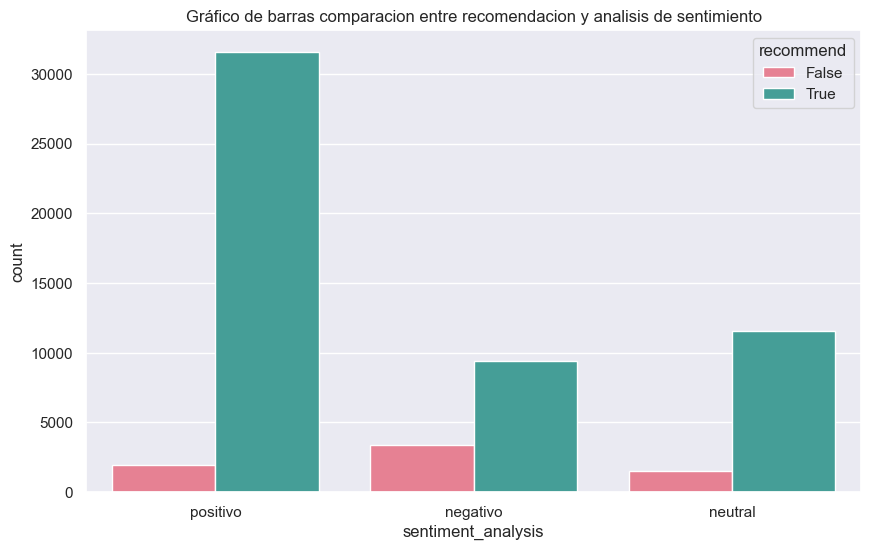

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

# Aplana las listas en 'sentiment_analysis' y 'recommend'
sentiment_analysis_flat = pd.Series([item for sublist in df_user_reviews['sentiment_analysis'] for item in sublist])
recommend_flat = pd.Series([item for sublist in df_user_reviews['recommend'] for item in sublist])

# Crea un DataFrame a partir de las series aplanadas
df = pd.DataFrame({'sentiment_analysis': sentiment_analysis_flat, 'recommend': recommend_flat})

# Reemplaza los valores en 'sentiment_analysis' con 'positivo', 'neutral' y 'negativo'
df['sentiment_analysis'] = df['sentiment_analysis'].replace({2: 'positivo', 1: 'neutral', 0: 'negativo'})

# Crea un gráfico de barras
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment_analysis', hue='recommend', palette='husl')
plt.title('Gráfico de barras comparacion entre recomendacion y analisis de sentimiento')
plt.show()


## User_Items

In [26]:
df_user_items= pd.read_csv("Datos-Normalizados/australian_users_items_normalizado.csv")

In [27]:
df_user_items.sample(10)

,Unnamed: 0,user_id,items_count,steam_id,user_url,items
16178,18715,76561198047166475,80,76561198047166475,http://steamcommunity.com/profiles/76561198047...,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."
31662,36785,76561198070332861,101,76561198070332861,http://steamcommunity.com/profiles/76561198070...,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."
5145,5874,divmehz,88,76561197981261188,http://steamcommunity.com/id/divmehz,"[{'item_id': '240', 'item_name': 'Counter-Stri..."
8724,10050,76561198104117854,107,76561198104117854,http://steamcommunity.com/profiles/76561198104...,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."
49528,58358,76561198060457182,53,76561198060457182,http://steamcommunity.com/profiles/76561198060...,"[{'item_id': '4700', 'item_name': 'Medieval II..."
34749,40384,76561197971027247,276,76561197971027247,http://steamcommunity.com/profiles/76561197971...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
28898,33563,76561198071374270,3,76561198071374270,http://steamcommunity.com/profiles/76561198071...,"[{'item_id': '730', 'item_name': 'Counter-Stri..."
42463,49732,76561198039514270,66,76561198039514270,http://steamcommunity.com/profiles/76561198039...,"[{'item_id': '240', 'item_name': 'Counter-Stri..."
48104,56545,76561198056898675,78,76561198056898675,http://steamcommunity.com/profiles/76561198056...,"[{'item_id': '240', 'item_name': 'Counter-Stri..."
67667,83721,johnshere,90,76561198097807992,http://steamcommunity.com/id/johnshere,"[{'item_id': '220', 'item_name': 'Half-Life 2'..."


In [28]:
df_user_items['items']

0        [{'item_id': '10', 'item_name': 'Counter-Strik...
1        [{'item_id': '10', 'item_name': 'Counter-Strik...
2        [{'item_id': '1200', 'item_name': 'Red Orchest...
3        [{'item_id': '10', 'item_name': 'Counter-Strik...
4        [{'item_id': '300', 'item_name': 'Day of Defea...
                               ...                        
70934    [{'item_id': '11020', 'item_name': 'TrackMania...
70935    [{'item_id': '218230', 'item_name': 'PlanetSid...
70936    [{'item_id': '413850', 'item_name': 'CS:GO Pla...
70937    [{'item_id': '11020', 'item_name': 'TrackMania...
70938    [{'item_id': '304930', 'item_name': 'Unturned'...
Name: items, Length: 70939, dtype: object

In [29]:
df_user_items=df_user_items.dropna()

In [30]:
df_user_items['items'] = df_user_items['items'].apply(lambda x: eval(x) if pd.notna(x) else [])


In [31]:
df_user_items['item_id'] = df_user_items['items'].apply(lambda reviews: [review['item_id'] for review in reviews])


In [32]:
df_user_items['item_name'] = df_user_items['items'].apply(lambda reviews: [review['item_name'] for review in reviews])

In [33]:
df_user_items['playtime_forever'] = df_user_items['items'].apply(lambda reviews: [review['playtime_forever'] for review in reviews])

In [34]:
df_user_items['playtime_2weeks'] = df_user_items['items'].apply(lambda reviews: [review['playtime_2weeks'] for review in reviews])

In [35]:
df_user_items.sample(10)

,Unnamed: 0,user_id,items_count,steam_id,user_url,items,item_id,item_name,playtime_forever,playtime_2weeks
34026,39554,76561198053714303,279,76561198053714303,http://steamcommunity.com/profiles/76561198053...,"[{'item_id': '220', 'item_name': 'Half-Life 2'...","[220, 340, 4000, 400, 12900, 17410, 15620, 606...","[Half-Life 2, Half-Life 2: Lost Coast, Garry's...","[151, 0, 2629, 75, 174, 12, 198, 924, 9, 133, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
35350,41087,76561198103892586,13,76561198103892586,http://steamcommunity.com/profiles/76561198103...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te...","[205790, 99900, 113400, 208090, 236390, 248570...","[Dota 2 Test, Spiral Knights, APB Reloaded, Lo...","[0, 6547, 241, 2482, 862, 1794, 1658, 4212, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
30376,35270,CornFlakes0401,161,76561198057295908,http://steamcommunity.com/id/CornFlakes0401,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[240, 300, 320, 340, 220, 4000, 9050, 7670, 40...","[Counter-Strike: Source, Day of Defeat: Source...","[2739, 0, 0, 65, 103, 2699, 499, 294, 192, 42,...","[3, 0, 0, 0, 0, 0, 0, 0, 192, 0, 0, 0, 0, 0, 0..."
24447,28413,tarooo_xd,17,76561198146939844,http://steamcommunity.com/id/tarooo_xd,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 730, 219640, 232210, 224260, 218640, 27...","[Garry's Mod, Counter-Strike: Global Offensive...","[161, 61233, 136, 0, 12, 101, 2, 151, 1219, 98...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
63579,77874,76561198087556816,5,76561198087556816,http://steamcommunity.com/profiles/76561198087...,"[{'item_id': '1250', 'item_name': 'Killing Flo...","[1250, 35420, 105600, 220860, 205790]","[Killing Floor, Killing Floor Mod: Defence All...","[2690, 8, 1572, 46, 3]","[0, 0, 0, 0, 0]"
38723,45158,76561198001784922,133,76561198001784922,http://steamcommunity.com/profiles/76561198001...,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[240, 4700, 4000, 6850, 6860, 6900, 20510, 457...","[Counter-Strike: Source, Medieval II: Total Wa...","[3011, 5556, 303, 81, 1892, 0, 0, 567, 57, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6455,7418,76561197989469116,141,76561197989469116,http://steamcommunity.com/profiles/76561197989...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 80, 100, 4000, 6300, 6310, 9180, 400, 320...","[Counter-Strike, Counter-Strike: Condition Zer...","[4869, 6293, 0, 2692, 0, 0, 1, 76, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
36369,42264,76561197967469174,3205,76561197967469174,http://steamcommunity.com/profiles/76561197967...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 20, 30, 40, 50, 60, 70, 130, 80, 100, 240...","[Counter-Strike, Team Fortress Classic, Day of...","[13, 3, 0, 0, 0, 1, 41, 52, 7, 0, 0, 0, 0, 153...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
27932,32461,76561197977069916,91,76561197977069916,http://steamcommunity.com/profiles/76561197977...,"[{'item_id': '220', 'item_name': 'Half-Life 2'...","[220, 240, 320, 340, 50, 70, 4540, 4550, 47515...","[Half-Life 2, Counter-Strike: Source, Half-Lif...","[1094, 32823, 0, 0, 244, 1, 996, 0, 0, 0, 0, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
47275,55550,76561198054286802,5,76561198054286802,http://steamcommunity.com/profiles/76561198054...,"[{'item_id': '300', 'item_name': 'Day of Defea...","[300, 240, 550, 223530, 730]","[Day of Defeat: Source, Counter-Strike: Source...","[157, 710, 306, 0, 2640]","[0, 0, 0, 0, 0]"


C:\Users\Facundete\AppData\Local\Temp\ipykernel_5304\1384971458.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='item_name', x='playtime_forever', data=df_sorted, palette='viridis')


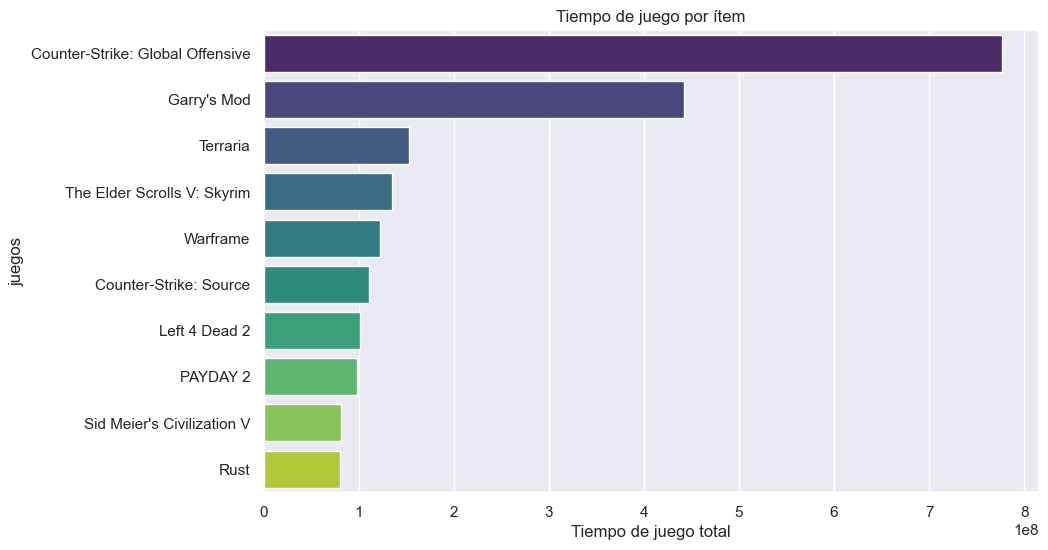

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aplana las listas en 'item_name' y 'playtime_forever'
item_name_flat = pd.Series([item for sublist in df_user_items['item_name'] for item in sublist])
playtime_forever_flat = pd.Series([item for sublist in df_user_items['playtime_forever'] for item in sublist])

# Crea un DataFrame a partir de las series aplanadas
df_flat = pd.DataFrame({'item_name': item_name_flat, 'playtime_forever': playtime_forever_flat})

# Agrupa por 'item_name' y calcula la suma de 'playtime_forever' para cada ítem
df_grouped = df_flat.groupby('item_name')['playtime_forever'].sum().reset_index()

# Ordena los ítems por 'playtime_forever' en orden descendente y toma los primeros 10
df_sorted = df_grouped.sort_values('playtime_forever', ascending=False).head(10)

# Establece el tema de seaborn
sns.set_theme()

# Crea un gráfico de barras vertical con seaborn
plt.figure(figsize=(10,6))
sns.barplot(y='item_name', x='playtime_forever', data=df_sorted, palette='viridis')
plt.ylabel('juegos')
plt.xlabel('Tiempo de juego total')
plt.title('Tiempo de juego por ítem')
plt.show()


In [37]:
df.columns

Index(['sentiment_analysis', 'recommend'], dtype='object')

In [38]:
df_merged = df_user_items.merge(df_user_reviews, on='user_id', how='left')


In [39]:
df_merged.sample(5)


,Unnamed: 0,user_id,items_count,steam_id,user_url_x,items,item_id_x,item_name,playtime_forever,playtime_2weeks,user_url_y,reviews,review_content,item_id_y,sentiment_analysis,recommend
5274,5903,_exodus_,129,76561198081976097,http://steamcommunity.com/id/_exodus_,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 240, 20, 50, 70, 130, 220, 280, 320, 34...","[Garry's Mod, Counter-Strike: Source, Team For...","[13770, 967, 22, 0, 297, 0, 180, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
28530,32835,Mikaris,90,76561198053619286,http://steamcommunity.com/id/Mikaris,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 1250, 35420, 550, 223530, 8190, 8930, 2...","[Garry's Mod, Killing Floor, Killing Floor Mod...","[7833, 268, 0, 149, 0, 158, 6, 0, 399, 36459, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 804, 0, 0, 0, 0, 0...",http://steamcommunity.com/id/Mikaris,"[{'sentiment_analysis': 2, 'funny': '1 person ...","[""I've spent countless hours on this game, par...","[223750, 351290]","[2, 2]","[True, True]"
2804,3170,SwinburnCyphenMisslemike,136,76561198049315551,http://steamcommunity.com/id/SwinburnCyphenMis...,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[240, 300, 320, 340, 4000, 7670, 409710, 220, ...","[Counter-Strike: Source, Day of Defeat: Source...","[8240, 7520, 6, 39, 200974, 1372, 1706, 817, 0...","[0, 0, 0, 0, 7080, 1, 1706, 0, 0, 0, 0, 0, 0, ...",http://steamcommunity.com/id/SwinburnCyphenMis...,"[{'sentiment_analysis': 2, 'funny': '296 peopl...","['Before I even say anything, I love the guard...","[113020, 219150, 1250, 294860, 245170, 28050]","[2, 1, 0, 2, 1, 1]","[True, True, True, True, True, True]"
68869,85063,76561198102098725,5,76561198102098725,http://steamcommunity.com/profiles/76561198102...,"[{'item_id': '35140', 'item_name': 'Batman: Ar...","[35140, 205790, 200260, 286100, 304930]","[Batman: Arkham Asylum GOTY Edition, Dota 2 Te...","[825, 0, 0, 0, 7]","[0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN
41577,48307,blazeworker,143,76561198030857576,http://steamcommunity.com/id/blazeworker,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 20900, 22000, 17460, 22320, 35700, 3822...","[Garry's Mod, The Witcher: Enhanced Edition, W...","[572, 20, 0, 990, 42, 8, 438, 0, 54, 551, 0, 9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",http://steamcommunity.com/id/blazeworker,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['the best NA'],[15700],[2],[True]


In [40]:
df_merged.columns

Index(['Unnamed: 0', 'user_id', 'items_count', 'steam_id', 'user_url_x',
       'items', 'item_id_x', 'item_name', 'playtime_forever',
       'playtime_2weeks', 'user_url_y', 'reviews', 'review_content',
       'item_id_y', 'sentiment_analysis', 'recommend'],
      dtype='object')

In [41]:
df_merged=df_merged.drop('Unnamed: 0', axis=1)
df_merged=df_merged.drop('items', axis=1)
df_merged=df_merged.drop('reviews', axis=1)
df_merged=df_merged.drop('user_url_y', axis=1)

In [42]:
df_merged.sample(3)

,user_id,items_count,steam_id,user_url_x,item_id_x,item_name,playtime_forever,playtime_2weeks,review_content,item_id_y,sentiment_analysis,recommend
38728,shartblaster,180,76561197998168398,http://steamcommunity.com/id/shartblaster,"[4000, 2600, 23310, 22320, 6060, 6000, 32370, ...","[Garry's Mod, Vampire: The Masquerade - Bloodl...","[0, 67, 0, 2655, 1697, 0, 98, 0, 0, 124, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN
57400,76561198073469606,2,76561198073469606,http://steamcommunity.com/profiles/76561198073...,"[205790, 291480]","[Dota 2 Test, Warface]","[0, 0]","[0, 0]",NaN,NaN,NaN,NaN
23782,76561198077815693,14,76561198077815693,http://steamcommunity.com/profiles/76561198077...,"[4000, 105600, 205790, 206440, 113020, 109400,...","[Garry's Mod, Terraria, Dota 2 Test, To the Mo...","[1, 1500, 0, 171, 12, 822, 5, 871, 36, 76, 10,...","[0, 0, 0, 0, 12, 0, 0, 0, 11, 0, 0, 0, 1, 252]",NaN,NaN,NaN,NaN


In [43]:
df_merged = df_merged.rename(columns={'user_url_x': 'user_url'})

In [44]:
df_merged.sample(3)

,user_id,items_count,steam_id,user_url,item_id_x,item_name,playtime_forever,playtime_2weeks,review_content,item_id_y,sentiment_analysis,recommend
40973,76561198026283900,52,76561198026283900,http://steamcommunity.com/profiles/76561198026...,"[550, 223530, 39160, 39190, 39200, 205790, 390...","[Left 4 Dead 2, Left 4 Dead 2 Beta, Dungeon Si...","[8732, 0, 1332, 36, 7, 0, 0, 0, 0, 0, 5, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN
55775,hiimkwz,9,76561198071174958,http://steamcommunity.com/id/hiimkwz,"[205790, 203140, 205930, 209870, 251670, 21974...","[Dota 2 Test, Hitman: Absolution, Hitman: Snip...","[0, 1039, 0, 88, 23, 673, 0, 11136, 6]","[0, 0, 0, 0, 0, 0, 0, 108, 0]",NaN,NaN,NaN,NaN
61522,76561198082342893,20,76561198082342893,http://steamcommunity.com/profiles/76561198082...,"[4000, 31280, 205790, 215470, 230410, 209870, ...","[Garry's Mod, Poker Night at the Inventory, Do...","[15861, 304, 0, 216, 1020, 149, 0, 1, 0, 8, 30...","[54, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0...",NaN,NaN,NaN,NaN


In [45]:
df_merged.to_json('steam_user_info.json.gzip', orient='records', lines=True, compression="gzip")

In [46]:
df_user_items.info

<bound method DataFrame.info of        Unnamed: 0            user_id  items_count           steam_id  \
0               0  76561197970982479          277  76561197970982479   
1               1            js41637          888  76561198035864385   
2               2          evcentric          137  76561198007712555   
3               3         Riot-Punch          328  76561197963445855   
4               4              doctr          541  76561198002099482   
...           ...                ...          ...                ...   
70934       88303  76561198320136420          321  76561198320136420   
70935       88304          ArkPlays7            4  76561198321542621   
70936       88305  76561198323066619           22  76561198323066619   
70937       88306  76561198326700687          177  76561198326700687   
70938       88308  76561198329548331            7  76561198329548331   

                                                user_url  \
0      http://steamcommunity.com/profiles/7

In [47]:
df_user_reviews.info

<bound method DataFrame.info of                  user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
2              evcentric             http://steamcommunity.com/id/evcentric   
3                  doctr                 http://steamcommunity.com/id/doctr   
4              maplemage             http://steamcommunity.com/id/maplemage   
...                  ...                                                ...   
25794  76561198306599751  http://steamcommunity.com/profiles/76561198306...   
25795           Ghoustik              http://steamcommunity.com/id/Ghoustik   
25796  76561198310819422  http://steamcommunity.com/profiles/76561198310...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                   

In [48]:
merged_data = pd.merge(df_user_items, df_user_reviews, on='user_id', how='left')

In [49]:
merged_data.sample(2)

,Unnamed: 0,user_id,items_count,steam_id,user_url_x,items,item_id_x,item_name,playtime_forever,playtime_2weeks,user_url_y,reviews,review_content,item_id_y,sentiment_analysis,recommend
10001,11346,theburst,190,76561198010337295,http://steamcommunity.com/id/theburst,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 6860, 220, 320, 340, 360, 380, 400, 420...","[Garry's Mod, Hitman: Blood Money, Half-Life 2...","[357, 623, 2, 0, 0, 0, 0, 37, 0, 0, 6, 57, 19,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
14161,16109,76561198065507778,12,76561198065507778,http://steamcommunity.com/profiles/76561198065...,"[{'item_id': '550', 'item_name': 'Left 4 Dead ...","[550, 223530, 7670, 409710, 17410, 205790, 730...","[Left 4 Dead 2, Left 4 Dead 2 Beta, BioShock, ...","[8520, 0, 385, 0, 63, 0, 12088, 315, 1044, 43,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
merged_data.info

<bound method DataFrame.info of        Unnamed: 0            user_id  items_count           steam_id  \
0               0  76561197970982479          277  76561197970982479   
1               1            js41637          888  76561198035864385   
2               2          evcentric          137  76561198007712555   
3               3         Riot-Punch          328  76561197963445855   
4               4              doctr          541  76561198002099482   
...           ...                ...          ...                ...   
71230       88303  76561198320136420          321  76561198320136420   
71231       88304          ArkPlays7            4  76561198321542621   
71232       88305  76561198323066619           22  76561198323066619   
71233       88306  76561198326700687          177  76561198326700687   
71234       88308  76561198329548331            7  76561198329548331   

                                              user_url_x  \
0      http://steamcommunity.com/profiles/7